# Tarea N°3: Pregunta 1

### César Cerda Bollmann

In [1]:
install.packages('tidyr')
install.packages('ggplot2')
install.packages('data.table')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘generics’, ‘dplyr’, ‘tidyselect’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘scales’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [4]:
library(purrr)
library(ggplot2)
library(data.table)

### a) Gráfico la función densidad

In [5]:
x=seq(-10,10,0.1)
y=1:length(x)
for (i in 1:length(x)) {
    if (x[i]<0){
        y[i]=0.5*exp(x[i])
    } else if(x[i]>=0) {     
        y[i]=0.5*exp(-x[i])
    }
}

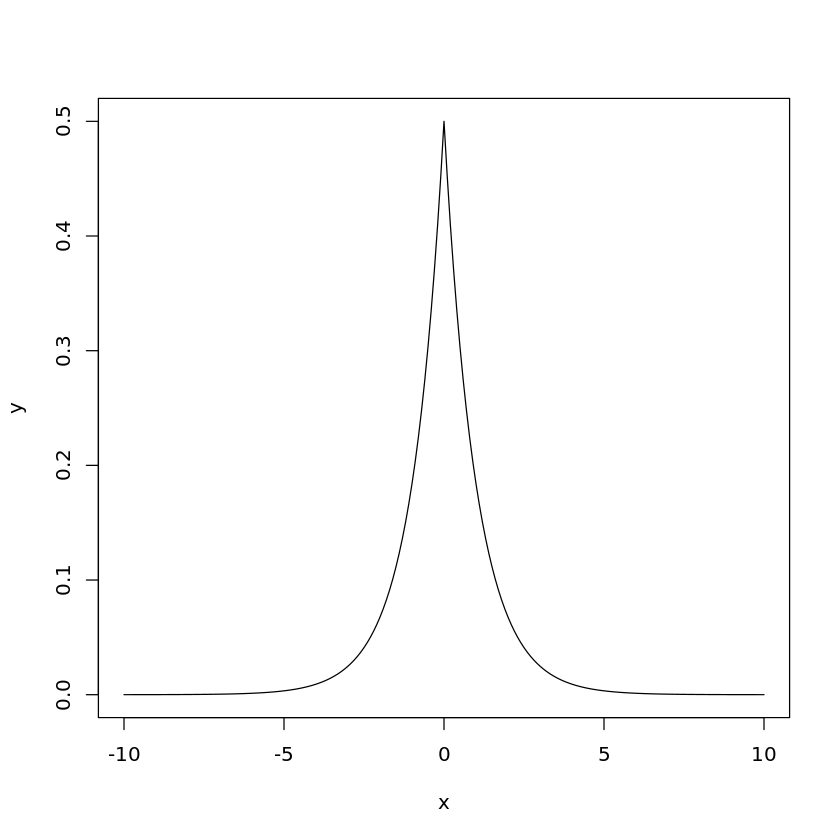

In [4]:
plot(x,y,type='l')

### b)Gráfico de F(x)

In [6]:
X = seq(-10,10,0.1)
F = 1:length(X)
for (i in 1:length(X)){
    if (X[i]<0){
        F[i] = 0.5*exp(X[i])
        }
    if (X[i]>=0){
        F[i]= 1- 0.5*exp(-X[i])
        }
    }

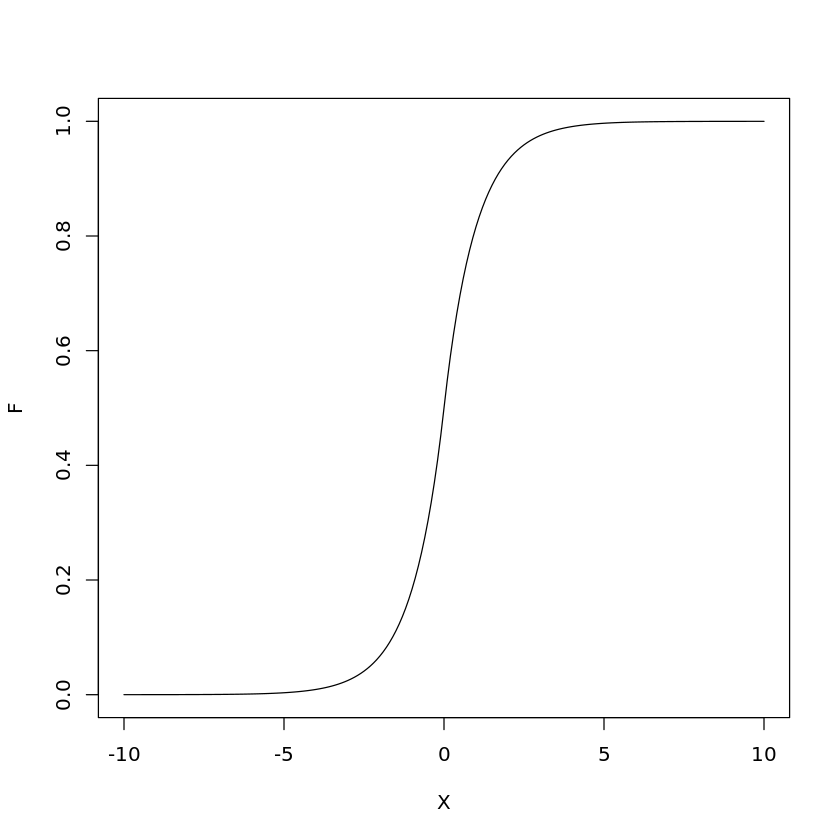

In [7]:
plot(X,F,type='l')

In [14]:
sample_uniform = runif(1000, 0, 1)

In [18]:
sample_F = 1:length(sample_uniform)
for (i in 1:length(sample_uniform)){
    if (sample_uniform[i]<0.5){
        sample_F[i] = log(2*sample_uniform[i])
        }
    if (sample_uniform[i]>=0.5){
        sample_F[i]= -log(2-2*sample_uniform[i])
        }
    }

In [19]:
sample_F_data = data.frame(sample_F)

In [20]:
sample_F_data['sample_F']

sample_F
<dbl>
-1.04769492
-1.91020177
-0.71053797
1.57014990
-0.37857684
0.64550182
0.85370075
-0.59234285
-0.41215582


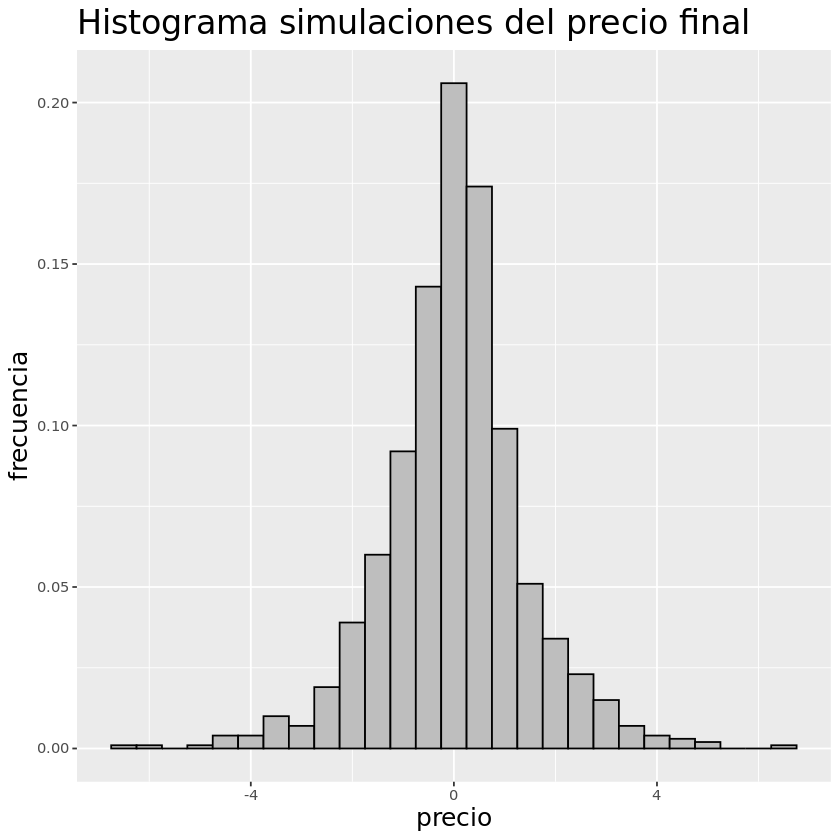

In [38]:
bin <- 0.5
plotfig <- ggplot(sample_F_data,aes(sample_F))+
        theme(plot.title = element_text(size = 20),
              axis.title.y=element_text(size = 15),
              axis.title.x=element_text(size = 15))
 
p <- plotfig+geom_histogram(aes(y = after_stat(count /(sum(count)))), binwidth=bin, color="black", fill="gray")+
       labs(x="precio",
            y="frecuencia",
            title=paste0("Histograma simulaciones del precio final"))

#p <- p+ geom_vline(aes(xintercept=mean(PT)),
#            color="blue", linetype="dashed", size=1)
           
p 

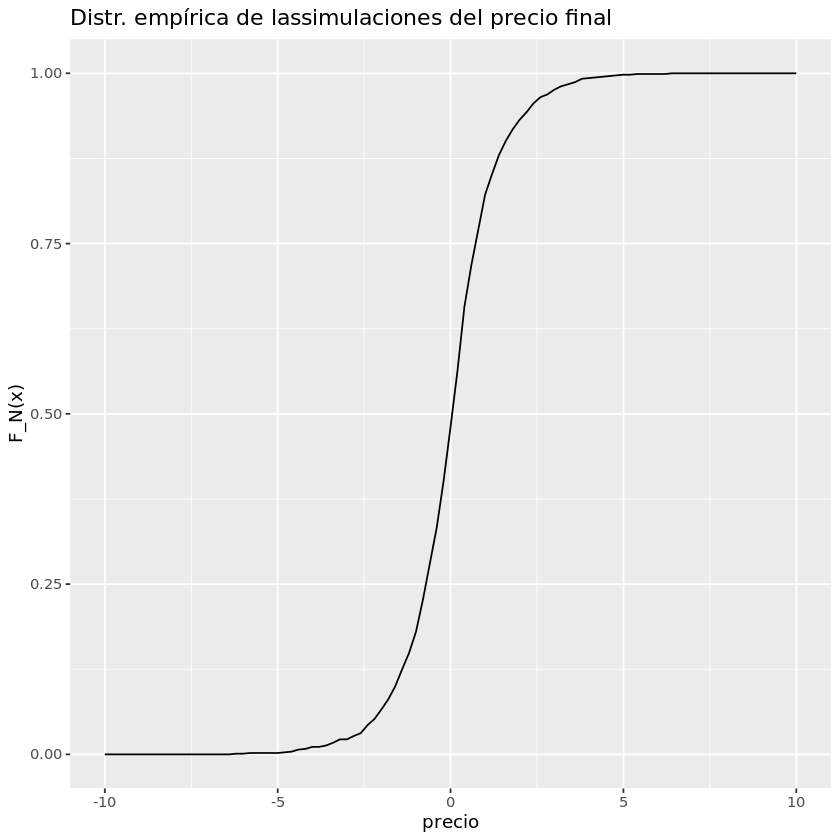

In [22]:
pfin2 = ggplot(sample_F_data,aes(sample_F))+geom_function(fun=ecdf(sample_F))+
         xlim(-10,10)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
pfin2

In [ ]:
f <- ggplot(data.frame(x = c(0, 10)), aes(x))
f + stat_function(fun = sin, colour = "red") + stat_function(fun = cos, colour = "blue")

# Using a custom function
test <- function(x) {x ^ 2 + x + 20}
f + stat_function(fun = test)

In [25]:
f <- ggplot(data.frame(x = c(-10, 10)), aes(x))

In [ ]:
test2 = function(x) {ifelse(x<0, 1, 2)}

In [33]:
test3 = function(x) {ifelse(x<0, 0.5*exp(x),1- 0.5*exp(-x))}

In [24]:
test2 = function(x) { if (x<0){
    x=1
    }else{x=3}
    }

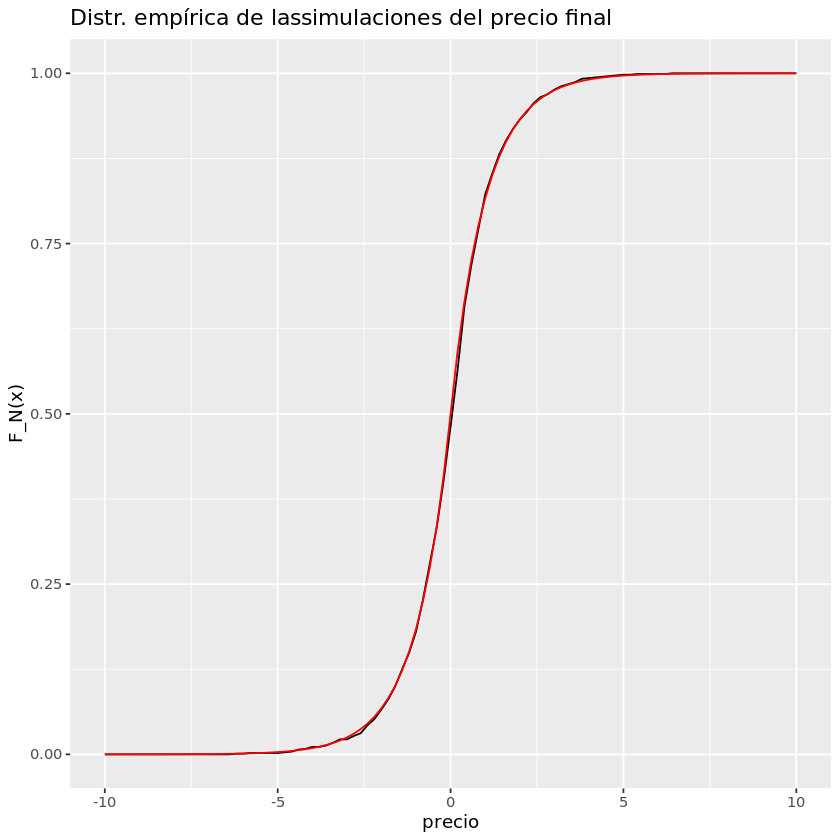

In [61]:
pfin3 = pfin2 + stat_function(fun = test3, color="red")
pfin3

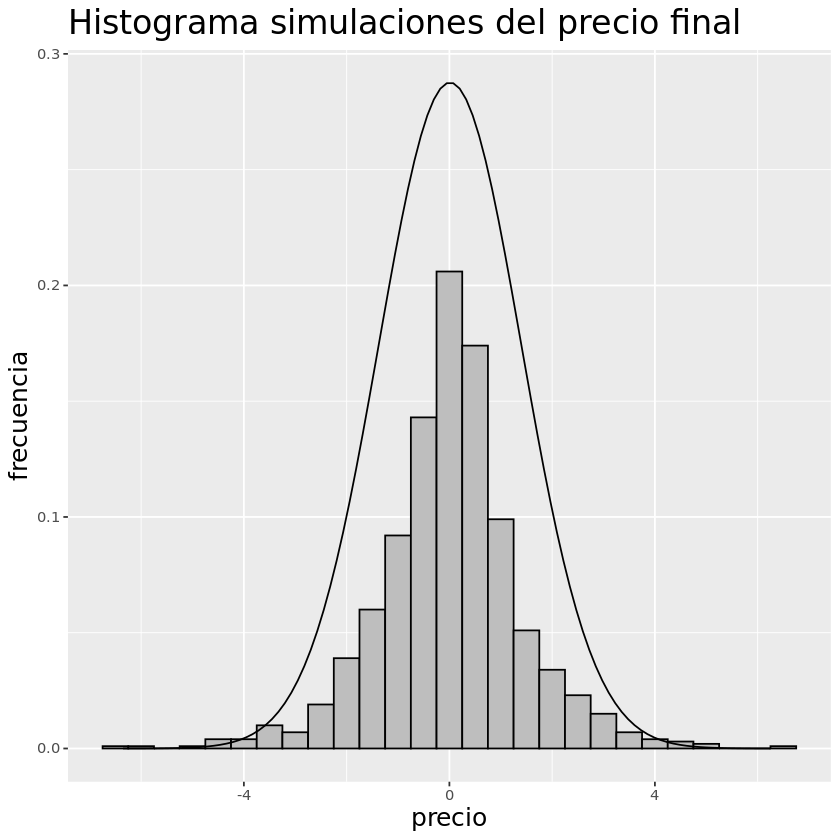

In [59]:
p+geom_function(fun = dnorm, args = list(mean = 0.01226, sd = 1.387))

In [66]:
pfin4 =pfin3+stat_function(fun = pnorm, n = 1000, args = list(mean = 0.01226, sd = 1.387), color = "green") 

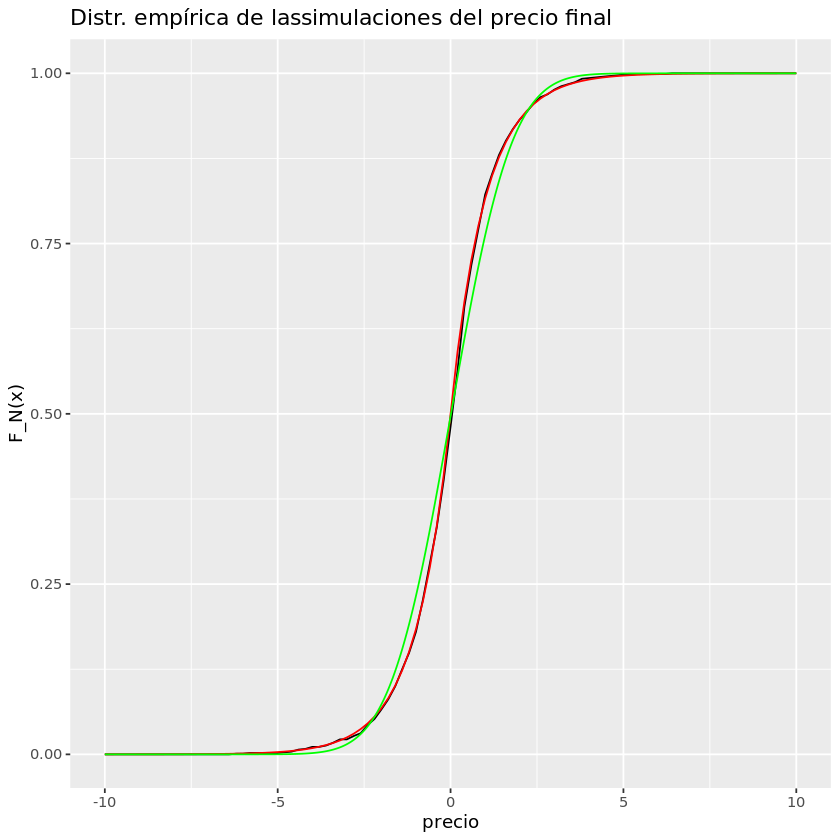

In [67]:
pfin4

In [41]:
media =mean(sample_F)
media

[1] 0.01225856

In [44]:
stdrd =sd(sample_F)
stdrd

[1] 1.386995

In [70]:
pfin5 = pfin3+geom_function(fun=pnorm, args = list(mean = 0.01226, sd = 1.387), color="red")

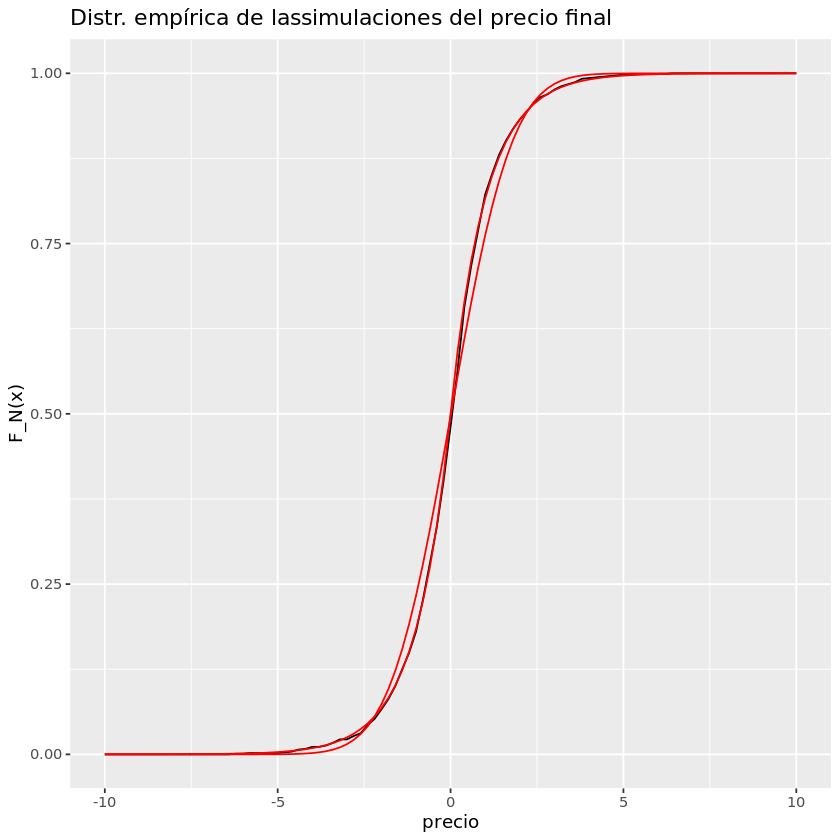

In [71]:
pfin5